# Курс аналитик данных на Python
## Модуль 7.3 А/Б-тестирование с помощью Python. Непараметрические оценки.

In [85]:
import pandas as pd #https://pandas.pydata.org/
import numpy as np #https://www.numpy.org/
import scipy as sc #https://www.scipy.org/

import matplotlib.pyplot as plt #https://matplotlib.org/
import seaborn as sns #https://seaborn.pydata.org/
import plotly  # import dash, jupyter_dash #https://plot.ly/

%matplotlib inline 

import warnings
warnings.simplefilter('ignore') #Здесь мы будем игнорировать предупреждения о грядущих изменениях вызовов sc.stats и прочего

**$H_0$** — основная гипотеза, $\mathcal{F} = \mathcal{F_0}$  
**$H_1$** — альтернативная гипотеза $\mathcal{F} \ne \mathcal{F_0}$

---
**_Критерий Колмогорова_**  
Важно: Распределение $\mathcal{F_0}$ должно быть непрерывным.

##### Задача
Собираемся открывать интернет-магазин, продавать компьютер какой-то модели Model. Мы рассматриваем цены на эту модель компьютеров в разных магазинах какой-то страны. Чтобы эффективно выйти на рынок, нам желательно поставить цену ниже некоторого "большинства", но не самую маленькую.
Собрали такие данные по 20 конкурентам: [90, 68, 51, 82, 62, 92, 85, 57, 68, 81, 70, 76, 78, 66, 80, 91, 97,
       88, 79, 76].

$H_0$: распределение имеет нормальный закон.  
$H_1$: распределение имеет какой-то другой закон.

In [86]:
X = np.array([90, 68, 51, 82, 62, 92, 85, 57, 68, 81, 70, 76, 78, 66, 80, 91, 97, 88, 79, 76])
n = X.shape[0]

# выборочное среднее
x_mean = np.mean(X)
# несмещённая выборочная дисперсия 
x_var_corr = ((x_mean - X)**2/(n-1)).sum()
# выборочное несмещённое среднеквадратическое отклонение
x_std_corr = np.sqrt(x_var_corr)
print(f'Параметры распределения a: {x_mean:.2f}, var: {x_var_corr:.2f}, sigma: {x_std_corr:.2f}')

Параметры распределения a: 76.85, var: 150.77, sigma: 12.28


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


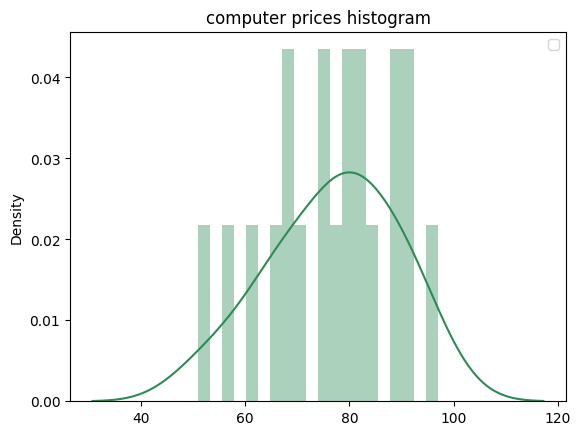

In [87]:
sns.distplot(X, color='seagreen', bins=20)
plt.title('computer prices histogram')
plt.legend()
plt.show()

Проводим тест. Передаём параметры в `args`, если этого не сделать, то тест будет сравнивать со стандартным нормальным распределением

In [88]:
sc.stats.kstest(X, cdf='norm', args=(x_mean, x_std_corr))

KstestResult(statistic=0.12240497269408301, pvalue=0.8904208418127803, statistic_location=76, statistic_sign=-1)

Получем 89% гипотеза $H_0$ верна. Хороший уровень значимости, но выборка сгенерирована из равномерного дискретного распределения. Здесь нужно быть осторожным, потому что сравниваем дискретное с непрерывным.

Сравним эту дискретную выборку с непрерывным равномерным распределением, подставив параметры `args` для равномерного распределения

In [89]:
sc.stats.kstest(X, cdf='uniform', args=(X.min(), X.max()-X.min()))

KstestResult(statistic=0.1934782608695652, pvalue=0.3920802516420857, statistic_location=76, statistic_sign=-1)

Получаем P-Value недостаточно высокий для того, чтобы утверждать, что оно принадлежит равномерному распределению.

Возьмём задачу про рост людей из предыдущего урока:

In [90]:
X = np.random.normal(180, 2, 100)
n = X.shape[0]

# выборочное среднее
x_mean = np.mean(X)
# несмещённая выборочная дисперсия 
x_var_corr = ((x_mean - X)**2/(n-1)).sum()
# выборочное несмещённое среднеквадратическое отклонение
x_std_corr = np.sqrt(x_var_corr)
print(f'Параметры распределения a: {x_mean:.2f}, var: {x_var_corr:.2f}, sigma: {x_std_corr:.2f}')

Параметры распределения a: 179.86, var: 4.02, sigma: 2.00


In [91]:
sc.stats.kstest(X, cdf='norm', args=(x_mean, x_std_corr))

KstestResult(statistic=0.08914987203168812, pvalue=0.3820896438482828, statistic_location=180.2644606464744, statistic_sign=-1)

In [92]:
X = np.random.uniform(50, 100, 100)

In [93]:
sc.stats.kstest(X, cdf='uniform', args=(50, 50))

KstestResult(statistic=0.046721458288709675, pvalue=0.9740275324378688, statistic_location=57.83607291443548, statistic_sign=-1)

---
**_Критерий Колмогорова-Смирнова_**  
Важно: Распределения $\mathcal{F_0}$ и $\mathcal{G_0}$  должны быть непрерывными.

**$H_0$** — основная гипотеза, $\mathcal{F} = \mathcal{G}$  
**$H_1$** — альтернативная гипотеза $\mathcal{F} \ne \mathcal{G}$

### Задача  
Все приходящие пользователи на сайт-игру случайным образом разделялись на две группы. Первой группе показывали старую версию, второй группе новую. Для каждого пользователя мы измерили количество проведённого времени в игре в минутах.  
Оно оказалось таким:

In [104]:
X0 = np.random.normal(30, 21, 100)
Y0 = np.random.normal(35, 23, 100)

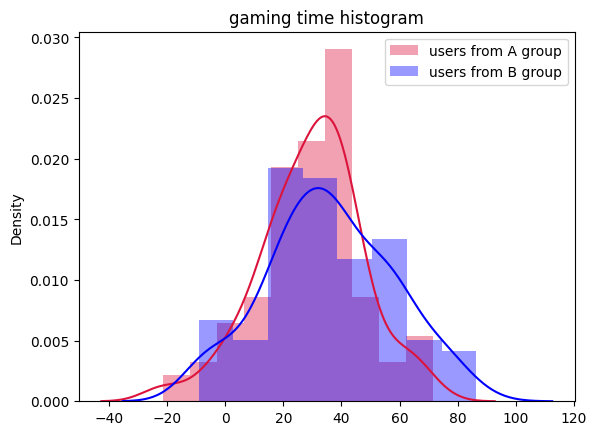

In [105]:
sns.distplot(X0, color='crimson', label='users from A group')
sns.distplot(Y0, color='blue', label='users from B group')
plt.title('gaming time histogram')
plt.legend()
plt.show()

In [106]:
sc.stats.ks_2samp(X0, Y0)

KstestResult(statistic=0.21, pvalue=0.024055802841094577, statistic_location=48.03484203692044, statistic_sign=1)

$H_0$ не верна

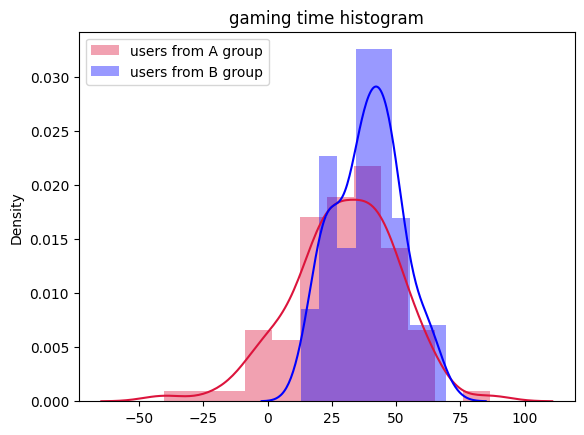

KstestResult(statistic=0.26, pvalue=0.002219935934558366, statistic_location=33.61083967824352, statistic_sign=1)

In [107]:
X1 = np.random.normal(30, 21, 100)
Y1 = np.random.normal(35, 15, 100)
sns.distplot(X1, color='crimson', label='users from A group')
sns.distplot(Y1, color='blue', label='users from B group')
plt.title('gaming time histogram')
plt.legend()
plt.show()
sc.stats.ks_2samp(X1, Y1)

$H_0$ не верна.

Такие результаты говорят о том, что:
* либо у нас недостаточно данных
* либо нужно выбирать другой критерий

---
**_Критерий Манна-Уитни_**  
Важно: Распределения $\mathcal{F_0}$ и $\mathcal{G_0}$  должны быть непрерывными.  
Этот критерий "не любит" много совпадающих значений, может применяться для малых выборок.

In [98]:
sc.stats.mannwhitneyu(X0, Y0)

MannwhitneyuResult(statistic=3659.0, pvalue=0.0010552635688740857)

In [99]:
sc.stats.mannwhitneyu(X1, Y1)

MannwhitneyuResult(statistic=4155.0, pvalue=0.03907066106665805)

В обоих случаях такой критерий показывает лучший результат. $H_0$ отвергаем

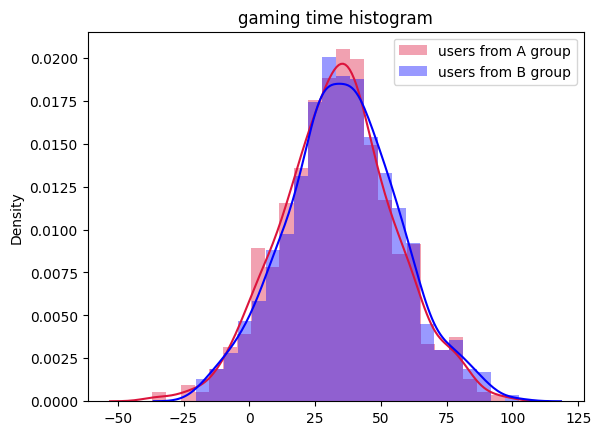

In [100]:
X2 = np.random.normal(35, 21, 1000)
Y2 = np.random.normal(35, 21, 1000)
sns.distplot(X2, color='crimson', label='users from A group')
sns.distplot(Y2, color='blue', label='users from B group')
plt.title('gaming time histogram')
plt.legend()
plt.show()

In [101]:
sc.stats.ks_2samp(X2, Y2)

KstestResult(statistic=0.051, pvalue=0.14836452078962484, statistic_location=44.89170350331177, statistic_sign=1)

In [102]:
sc.stats.mannwhitneyu(X2, Y2)

MannwhitneyuResult(statistic=474997.0, pvalue=0.052843047361888495)

Этот тест тоже говорит о том, что $H_0$ следует отвергнуть

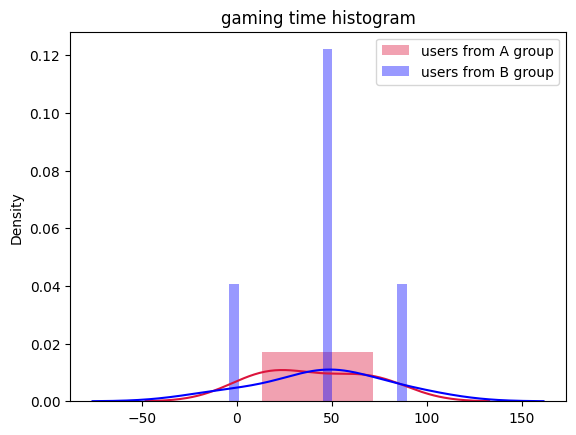

In [108]:
X2 = np.random.normal(35, 21, 5)
Y2 = np.random.normal(35, 21, 5)
sns.distplot(X2, color='crimson', label='users from A group')
sns.distplot(Y2, color='blue', label='users from B group')
plt.title('gaming time histogram')
plt.legend()
plt.show()

In [109]:
sc.stats.ks_2samp(X2, Y2)

KstestResult(statistic=0.4, pvalue=0.873015873015873, statistic_location=36.21876446943678, statistic_sign=1)

In [110]:
sc.stats.mannwhitneyu(X2, Y2)

MannwhitneyuResult(statistic=11.0, pvalue=0.8412698412698413)

Здесь P-Value говорит, что $H_0$ так же гипотеза не очень подходит, точнее непонятно, так как лучшие значения - это ближе к 1